In [1]:
#Creating maps with folium and leaflet
#Interracting with geojs lib
import pandas as pd
import folium as fl
from branca.element import Figure


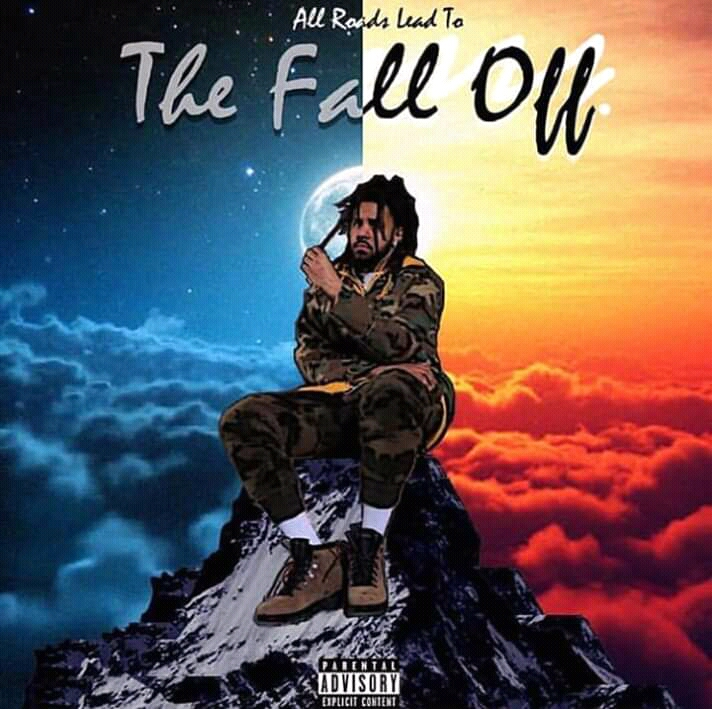

In [2]:
m = fl.Map(location = [-1.286280, 36.866718], zoomstart = 100)

#Global Tooltip
tooltip = "Click for more info"

#Create custom Icon Marker
customIcon = fl.features.CustomIcon("D:\Photos\snapshots\FB_IMG_15593785512784627.jpg", icon_size = (50,50))

#Create marker
fl.Marker([-1.292066, 36.821945], popup = "<strong>Nairobi</strong>", tooltip = tooltip).add_to(m)
fl.Marker([-1.279468, 36.877619], popup = "<strong>Mesora Supermarket</strong>", tooltip = tooltip, icon = fl.Icon(icon = "cloud")).add_to(m)
fl.Marker([-1.189468, 36.877719], popup = "<strong>Mesora Supermarket</strong>", tooltip = tooltip, icon = fl.Icon(color = "purple", prefix = "fa", icon = "anchor")).add_to(m)
fl.Marker([-1.389458, 36.879219], tooltip = tooltip, icon = fl.Icon(color = "green", icon = "leaf")).add_to(m)
fl.Marker([-1.449458, 36.679219], tooltip = tooltip, icon = customIcon).add_to(m) #Uses a picture file as the custom Icon

#Create a circle marker
fl.CircleMarker(location = [-1.292066, 36.821945], popup = "Location Unkown", radius = 50, color = "#428bca", fill = True, fill_color = "#428bca").add_to(m)

#Generate map
m.save("map.html")
m

In [3]:
m = fl.Map(location = [-1.286280, 36.866718], zoom_start = 10, min_zoom = 10, max_zoom = 15)
fl.Marker([-1.286280, 36.866718], popup = "<b>Nairobbery</b>", tooltip = "Click for more info", icon = fl.Icon(color = "blue")).add_to(m)
fig = Figure(width = 550, height = 350)
fl.TileLayer("Stamen Terrain").add_to(m)
fl.TileLayer("Stamen water color").add_to(m)
fl.TileLayer("Stamen Toner").add_to(m)
fl.TileLayer("cartodbpositron").add_to(m)
fl.TileLayer("cartodbdark_matter").add_to(m)
fl.LayerControl().add_to(m)
fig.add_child(m)

In [4]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\nyc-taxi-trip-duration\test\test.csv")
df.tail(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N
625133,id0621643,2,2016-01-01 00:00:22,2,-73.981850,40.716881,-73.969330,40.769379,N


In [5]:

pickuplongNull = (df["pickup_longitude"].any() == 0)
df["pickup_longitude"] = df.drop(index = df["pickup_longitude"].index, inplace = True)

pickupLong = df["pickup_longitude"].astype(float)
pickupLat = df["pickup_latitude"].astype(float)
dropoffLong = df["dropoff_longitude"].astype(float)
dropoffLat = df["dropoff_latitude"].astype(float)


m = fl.Map(location = [40.767937, -73.982155])
fl.Marker(location = [40.767937, -73.982155], popup = "<b>Route 1 </b>", tooltip = "Click for more info", icon = fl.Icon(color = "blue")).add_to(m)
fig = Figure(width = 550, height = 350)
fig.add_child(m)
for i in df.iterrows():
    fl.Marker(location = [i["pickup_longitude"], i["pickup_latitude"]], color = "blue").add_to(m)
    fl.Marker(location = [i["dropoff_longitude"], i["dropoff_latitude"]], color = "red").add_to(m)
    fl.PolyLine([[i["pickup_longitude"], i["pickup_latitude"],
                 i["dropoff_longitude"], i["dropoff_latitude"]]]).add_to(m)
m